In [31]:
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns
import requests as req
import numpy as np

In [32]:
archivo = 'iot_sensor_corrupted_dataset.csv'

In [33]:
df = pd.read_csv(archivo)
print("\nprimeras filas")
print(df.head())
print("\nInformación de las columnas")
df.info()


primeras filas
             timestamp device_id  temperature_C          humidity_% status
0  2030-05-15 00:00:00  ESP32_A2      26.490142  47.391160456649544     OK
1  2023-01-01 00:30:00  ESP32_A2      24.585207   69.17861947054776     OK
2  2023-01-01 01:00:00  ESP32_B1      26.943066               -10.0     OK
3  2023-01-01 01:30:00  ESP32_B1      29.569090   70.32465260551147     OK
4  2023-01-01 02:00:00  ESP32_A1            NaN   44.80630034045987     OK

Información de las columnas
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   timestamp      260 non-null    object 
 1   device_id      252 non-null    object 
 2   temperature_C  247 non-null    float64
 3   humidity_%     253 non-null    object 
 4   status         260 non-null    object 
dtypes: float64(1), object(4)
memory usage: 10.3+ KB


In [34]:
df = pd.read_csv(archivo)
print("\nprimeras filas")
print(df.head())
print("\nInformación de las columnas")
df.describe()


primeras filas
             timestamp device_id  temperature_C          humidity_% status
0  2030-05-15 00:00:00  ESP32_A2      26.490142  47.391160456649544     OK
1  2023-01-01 00:30:00  ESP32_A2      24.585207   69.17861947054776     OK
2  2023-01-01 01:00:00  ESP32_B1      26.943066               -10.0     OK
3  2023-01-01 01:30:00  ESP32_B1      29.569090   70.32465260551147     OK
4  2023-01-01 02:00:00  ESP32_A1            NaN   44.80630034045987     OK

Información de las columnas


,temperature_C
count,247.000000
mean,60.495392
std,182.895532
min,17.140765
25%,23.027326
50%,25.261141
75%,27.048787
max,999.000000


In [35]:
print("\n CONTEO DE VALORES NULOS ")
print(df.isnull().sum())


 CONTEO DE VALORES NULOS 
timestamp         0
device_id         8
temperature_C    13
humidity_%        7
status            0
dtype: int64


In [36]:
df = pd.read_csv(archivo)
print("\nprimeras filas")
print(df.head())
print("\nInformación de las columnas")
df.isnull().sum()


primeras filas
             timestamp device_id  temperature_C          humidity_% status
0  2030-05-15 00:00:00  ESP32_A2      26.490142  47.391160456649544     OK
1  2023-01-01 00:30:00  ESP32_A2      24.585207   69.17861947054776     OK
2  2023-01-01 01:00:00  ESP32_B1      26.943066               -10.0     OK
3  2023-01-01 01:30:00  ESP32_B1      29.569090   70.32465260551147     OK
4  2023-01-01 02:00:00  ESP32_A1            NaN   44.80630034045987     OK

Información de las columnas


timestamp         0
device_id         8
temperature_C    13
humidity_%        7
status            0
dtype: int64

In [37]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
255     True
256     True
257    False
258     True
259     True
Length: 260, dtype: bool

In [38]:
df = df.drop_duplicates()
df = df.fillna(df.mean(numeric_only=True))

In [39]:
df_clean = df.dropna(subset=['timestamp'])   #filtra las fechas que no son válidas

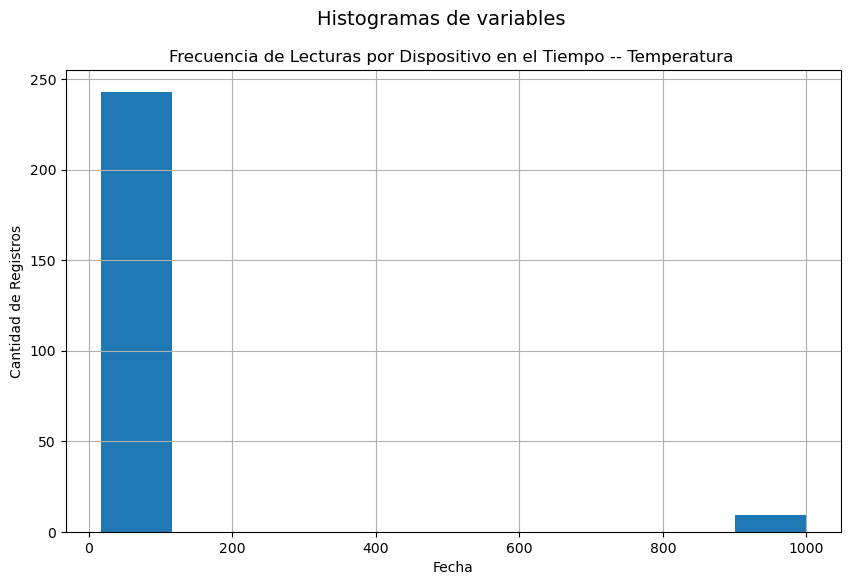

In [42]:
numeric_cols = df.select_dtypes(include=np.number).columns[:1]

df[numeric_cols].hist(figsize=(10,6))
plt.suptitle("Histogramas de variables", fontsize=14)
plt.title('Frecuencia de Lecturas por Dispositivo en el Tiempo -- Temperatura ')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Registros')
plt.show()

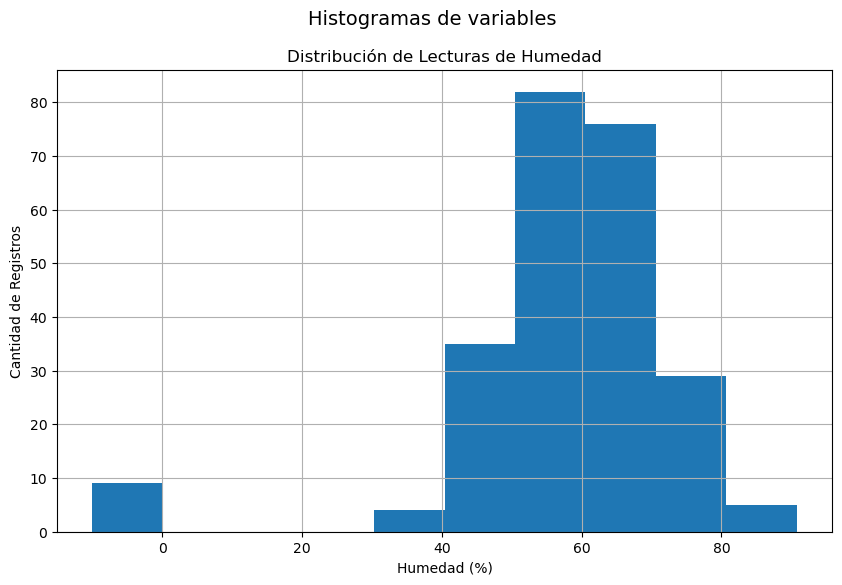

In [46]:
df['humidity_%'] = pd.to_numeric(df['humidity_%']) 
numeric_cols = ['humidity_%']
df[numeric_cols].hist(figsize=(10,6))

plt.suptitle("Histogramas de variables", fontsize=14)
plt.title('Distribución de Lecturas de Humedad')
plt.xlabel('Humedad (%)')
plt.ylabel('Cantidad de Registros')

plt.show()

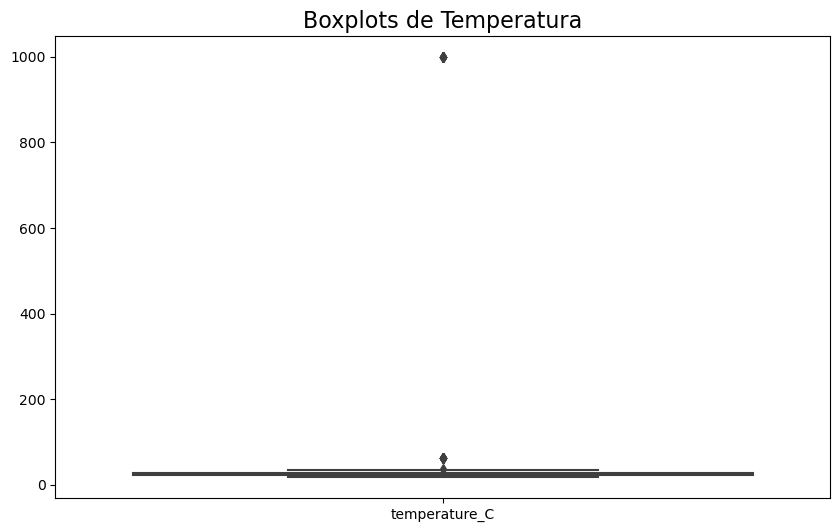

In [52]:
df['temperature_C'] = pd.to_numeric(df['temperature_C'])
numeric_cols = ['temperature_C']
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplots de Temperatura", fontsize=16)
plt.show()

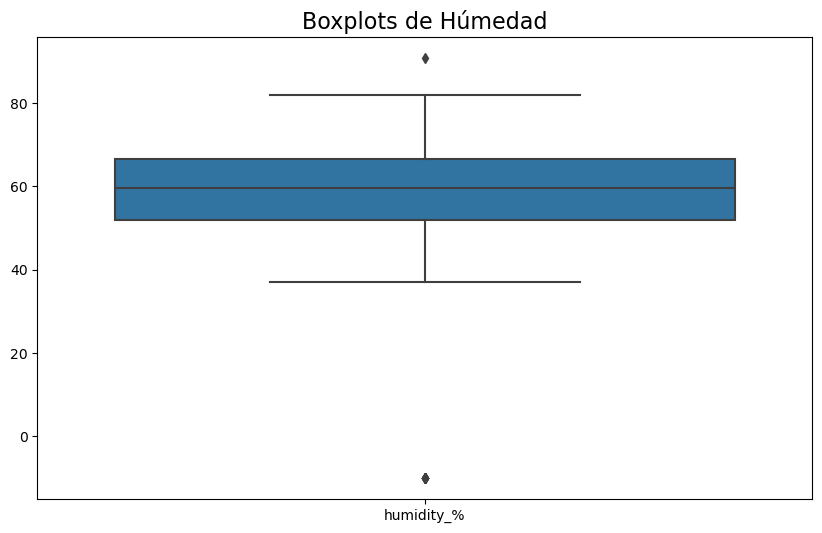

In [50]:
df['humidity_%'] = pd.to_numeric(df['humidity_%'])
numeric_cols = ['humidity_%']
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplots de Húmedad", fontsize=16)
plt.show()

In [ ]:
## Errores encontrados: Hay registros atemporales entre ellos 2030 con valores de texto "??", tal vez el software mqt al cual se envia los datos no tiene filtro
## Hay algunos sensores con el status fail, tal vez algun esp esta con problemas 
## Hay datos de un dispositivo que no esta como tal registrado 
## Hay un valor de húmedad en negativo 
## Hay un valor de temperatura NaN
## los diamantes en el boxplots simboliza las anomalias que hay el de punto bajo es el -10 en húmedad y en temperatura igual pero en el punto alto es decir un valor superior a 999 C